In [1]:
using CRCBS
using SpecialFunctions
using Distributions

┌ Info: Recompiling stale cache file /home/peltzer/.julia/compiled/v1.0/CRCBS/26Ksw.ji for CRCBS [edef75b8-3ac4-11e9-0392-bf149c536ee3]
└ @ Base loading.jl:1190
┌ Warning: Package CRCBS does not have JLD in its dependencies:
│ - If you have CRCBS checked out for development and have
│   added JLD as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with CRCBS
└ Loading JLD into CRCBS from project dependency, future warnings for CRCBS are suppressed.
┌ Warning: Replacing docs for `CRCBS.get_dist_matrix :: Tuple{LightGraphs.AbstractGraph}` in module `CRCBS`
└ @ Base.Docs docs/Docs.jl:223
┌ Warning: Replacing docs for `CRCBS.pad_matrix :: Union{Tuple{T}, Tuple{Array{T,2},Tuple{Int64,Int64},T}} where T` in module `CRCBS`
└ @ Base.Docs docs/Docs.jl:223


In [2]:
a = Hypergeometric1F1(5,2,100-1000im,50)

7.002864442038907e50 + 8.97377576745836e50im

In [3]:
n1=3
n2=2
t1=3.0
t2=5.0
nn=3
lambda=0.2

0.2

In [10]:
alpha = 0.5*(n1-n2)
beta = 0.5*(1-n1-n2)
c1 = 1.0/(gamma(n1)*(2.0*lambda)^((n1+n2)/2.0))
c2 = 1.0/(gamma(n2)*(2.0*lambda)^((n1+n2)/2.0))
phi = 0.5*(n1+n2)-1

1.0/(100^phi)

0.001

In [11]:
function hplus(y)
    density = (1-cdf(Gamma(nn,lambda),abs(t1-t2-y))) * c1 * (y^phi) * WhittakerM_cont(alpha,beta,2*y/lambda)
    return density
end

function hminus(y)
    density = (1-cdf(Gamma(nn,lambda),abs(t1-t2-y))) * c2 * ((-y)^phi) * WhittakerM_cont(-alpha,beta,-2*y/lambda)
    return density
end

hminus (generic function with 1 method)

In [12]:
beta

-2.0

In [13]:
hminus(-6)


6.143199893476956e10

In [14]:
using Plots

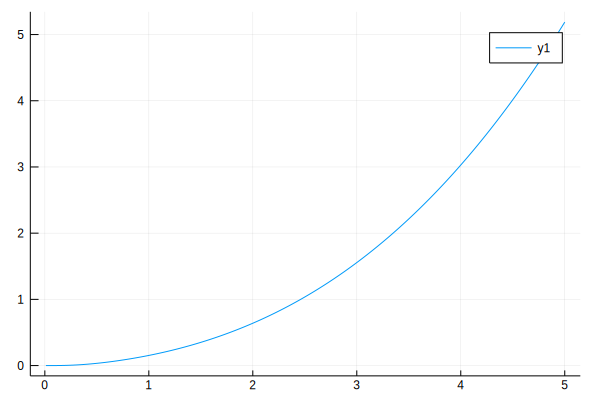

In [15]:
listy = collect(range(0.01,stop=5,step=0.01))
listd = [hplus(y) for y in listy]
listmy = collect(range(-10,stop=-0.01,step=0.01))
listmd = [hminus(y) for y in listmy]
plot(listy,listd)

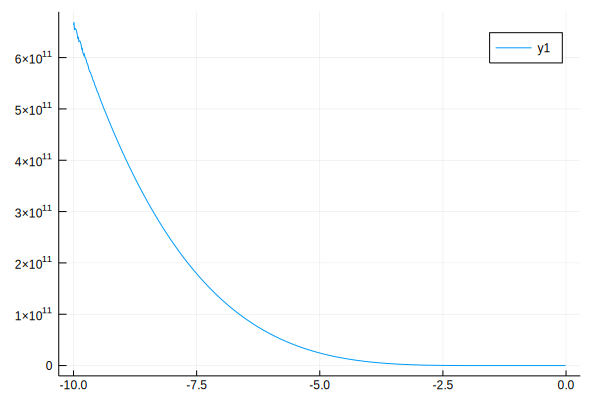

In [16]:
plot(listmy,listmd)

In [ ]:
hminus(-10)

In [ ]:
y=0.01
density = (1-cdf(Gamma(nn,lambda),abs(t1-t2-y))) * c1 * 1.0/(y^phi) * WhittakerM(alpha,beta,2*y/lambda)

In [ ]:
WhittakerM(1,4,5)

In [ ]:
WhittakerW(1,2,3)

In [ ]:
conflict_probability_node_w(n1,t1,n2,t2,nn,lambda)

In [ ]:
a=-2.0
b=-3.0
t=2500.0004999999996
N=50

h = 2*pi/N

c1 = 0.5017
c2 = 0.6407
c3 = 0.6122
c4 = 0.2645im

k = collect(1:N)
theta   = -pi .+ (k .+ 0.5)*h
z   = N/t*(c1*theta ./ Float64[tan(c2*thetai) for thetai in theta] .- c3 .+ c4*theta)
dz  = N/t*(-c1*c2*theta ./ Float64[sin(c2*thetai) for thetai in theta].^2 .+ c1./ Float64[tan(c2*thetai) for thetai in theta] .+ c4)

F = z .^(-b).*(1 .+ 1.0 ./z).^(a-b)

In [ ]:
evalint = sum([exp(zi*t) for zi in z] .* F .* dz)

In [ ]:
using Distributions
using SpecialFunctions

In [ ]:
inverse = try (t)^(1-b)
catch 
    (conj(t)/(norm(t))^2)^(b-1)
end

In [ ]:
val = gamma(b)*inverse*exp(t)*h/(2im*pi).*evalint